                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849


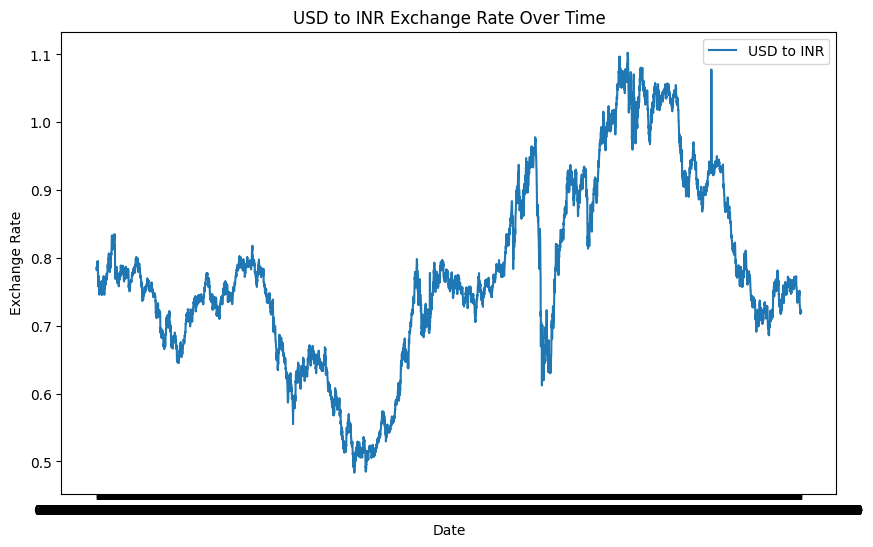

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')

# Display the first few rows
print(data.head())

# Plot the exchange rate time series
plt.figure(figsize=(10,6))
plt.plot(data['Ex_rate'], label='USD to INR')
plt.title('USD to INR Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


Ex_rate    0
dtype: int64


C:\Users\dhivya.dharani\AppData\Local\Temp\ipykernel_3268\2236162414.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


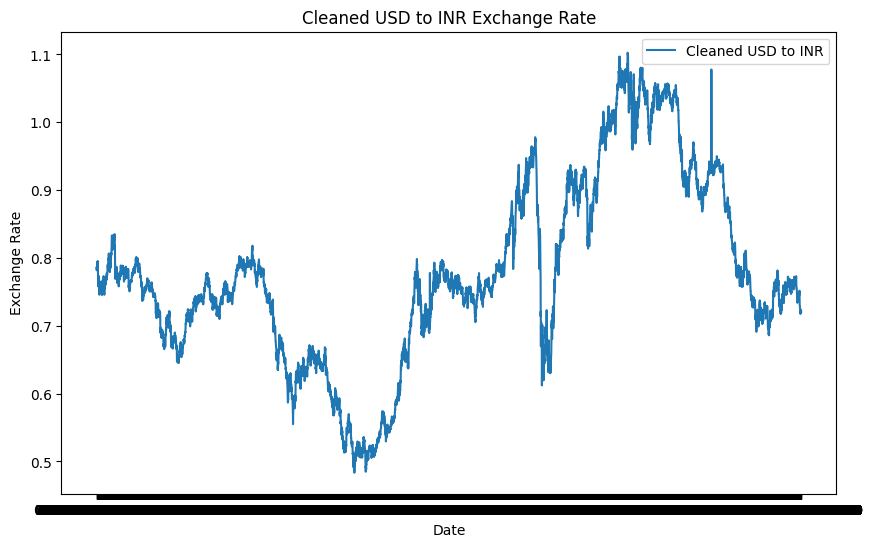

In [12]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any), for example, forward fill missing data
data.fillna(method='ffill', inplace=True)

# Replot after preprocessing
plt.figure(figsize=(10,6))
plt.plot(data['Ex_rate'], label='Cleaned USD to INR')
plt.title('Cleaned USD to INR Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


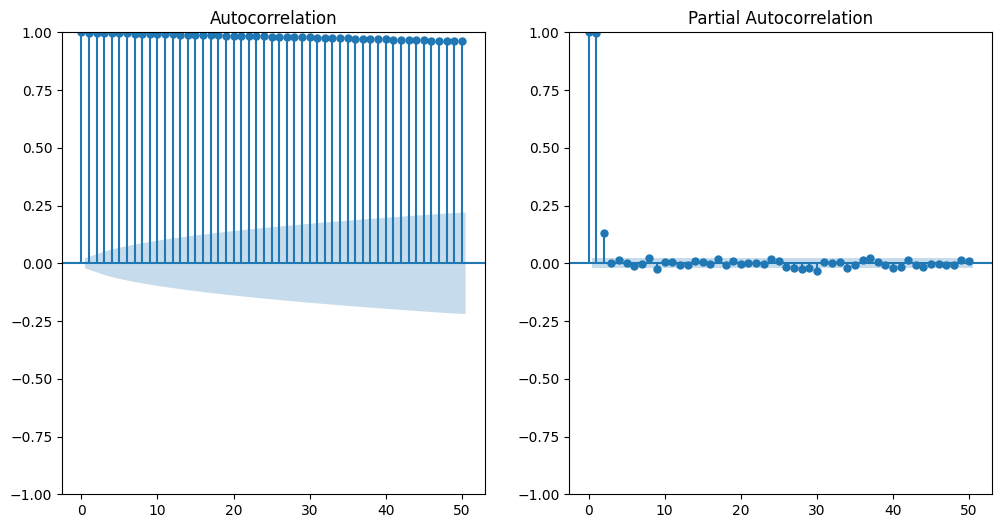

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(data['Ex_rate'], lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(data['Ex_rate'], lags=50, ax=plt.gca())
plt.show()


In [14]:
from statsmodels.tsa.arima.model import ARIMA
p = 1
d = 1 
q = 0
# Fit ARIMA model
model = ARIMA(data['Ex_rate'], order=(p, d, q))  # Use determined p, d, q
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 0)   Log Likelihood               28054.159
Date:                Thu, 28 Nov 2024   AIC                         -56104.319
Time:                        23:49:02   BIC                         -56090.450
Sample:                             0   HQIC                        -56099.559
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

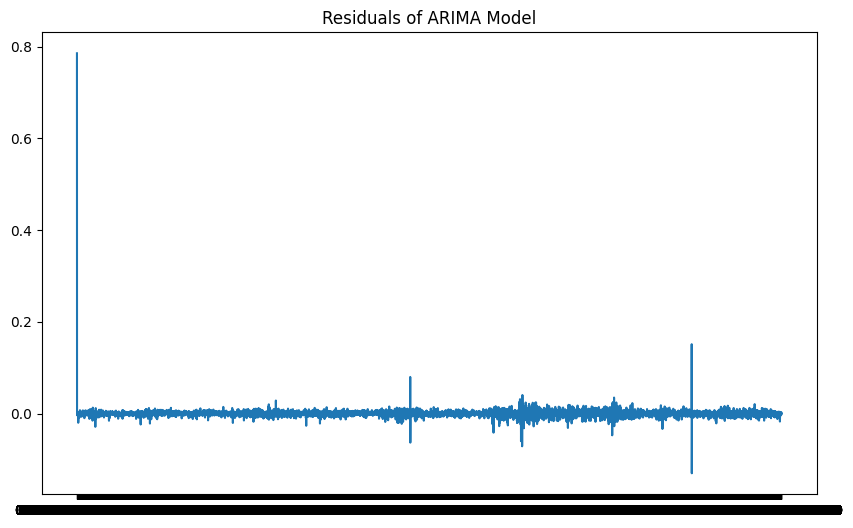

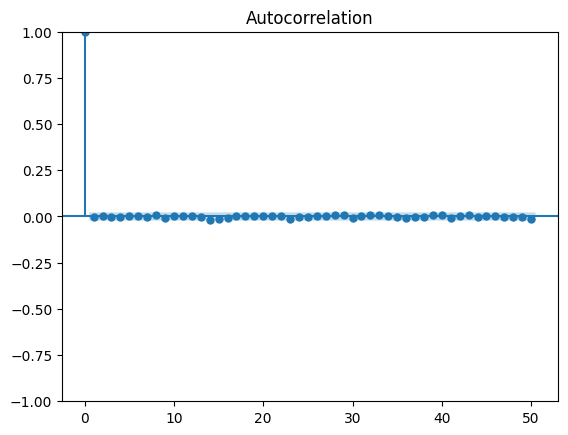

ADF Statistic: -157.80386384396914
p-value: 0.0


In [15]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# Check for autocorrelation in residuals
plot_acf(residuals, lags=50)
plt.show()

# Perform ADF test for stationarity of residuals
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(residuals)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])


c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\dhivya.dharani\AppData\Local\Temp\ipykernel_3268\2994711764.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label='Forecast', color='red')


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x000001AF413BFE50>.

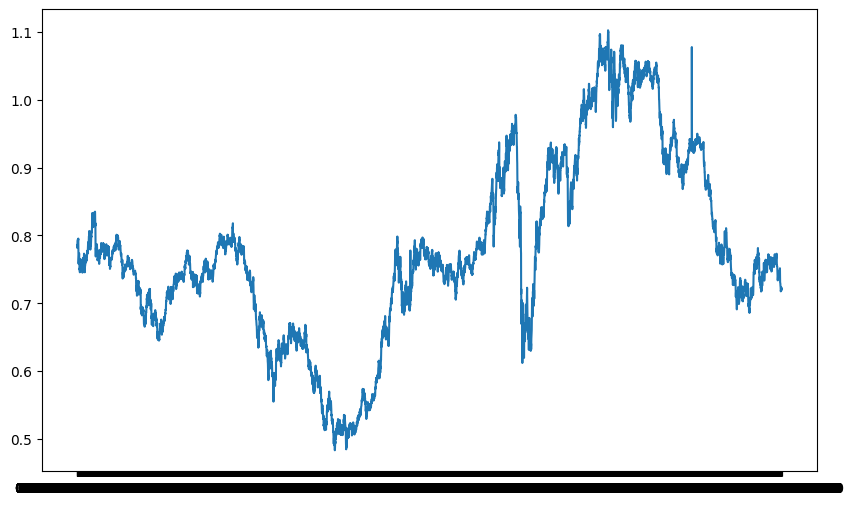

In [16]:
# Forecast the next 12 months (or desired time period)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Plot actual vs forecasted values
plt.figure(figsize=(10,6))
plt.plot(data['Ex_rate'], label='Historical Data')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast for USD to INR')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


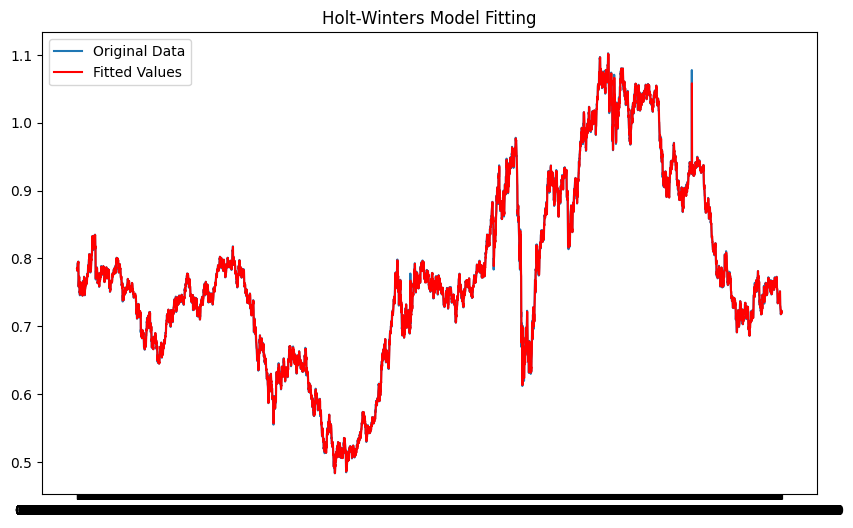

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model
hw_model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()

# Plot the fitted values
plt.figure(figsize=(10,6))
plt.plot(data['Ex_rate'], label='Original Data')
plt.plot(hw_fit.fittedvalues, label='Fitted Values', color='red')
plt.title('Holt-Winters Model Fitting')
plt.legend()
plt.show()


In [19]:
# Grid search for best parameters (Example)
# This is an illustrative example; the exact range will depend on the dataset
best_aic = float('inf')
best_params = None
for trend in ['add', 'mul', None]:
    for seasonal in ['add', 'mul', None]:
        for periods in [12]:  # Assuming yearly seasonality
            model = ExponentialSmoothing(data['Ex_rate'], trend=trend, seasonal=seasonal, seasonal_periods=periods)
            fit = model.fit()
            if fit.aic < best_aic:
                best_aic = fit.aic
                best_params = (trend, seasonal, periods)

print(f"Best parameters: {best_params} with AIC: {best_aic}")


c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\dhivya.dharani\AppData

Best parameters: (None, None, 12) with AIC: -77644.98075014984


c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\dhivya.dharani\AppData\Local\Temp\ipykernel_3268\3455556590.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq='M')[1:], hw_forecast, label='Forecast', color='orange')


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x000001AF43C824E0>.

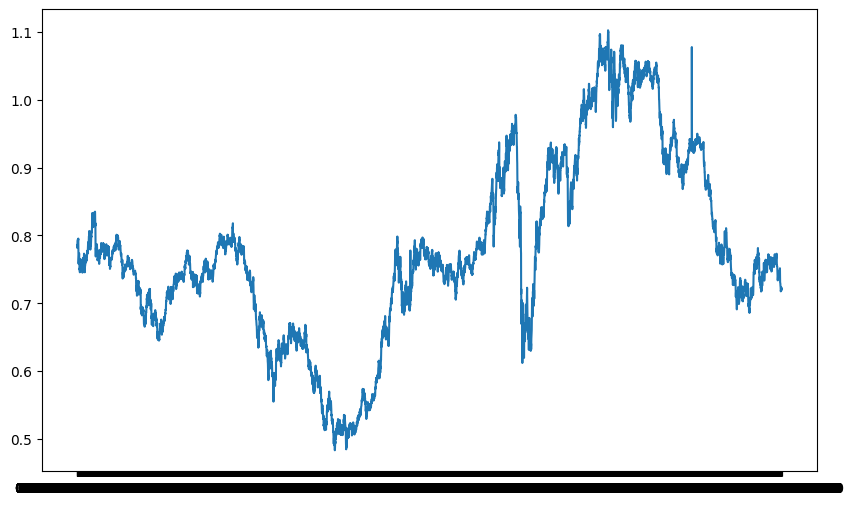

In [20]:
# Forecast future values
hw_forecast = hw_fit.forecast(steps=forecast_steps)

# Plot forecast vs actual
plt.figure(figsize=(10,6))
plt.plot(data['Ex_rate'], label='Historical Data')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq='M')[1:], hw_forecast, label='Forecast', color='orange')
plt.title('Holt-Winters Forecast for USD to AUD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate error metrics for ARIMA
arima_mae = mean_absolute_error(data['Ex_rate'][-forecast_steps:], forecast)
arima_rmse = mean_squared_error(data['Ex_rate'][-forecast_steps:], forecast, squared=False)
arima_mape = np.mean(np.abs((data['Ex_rate'][-forecast_steps:] - forecast) / data['Ex_rate'][-forecast_steps:])) * 100

# Calculate error metrics for Holt-Winters
hw_mae = mean_absolute_error(data['Ex_rate'][-forecast_steps:], hw_forecast)
hw_rmse = mean_squared_error(data['Ex_rate'][-forecast_steps:], hw_forecast, squared=False)
hw_mape = np.mean(np.abs((data['Ex_rate'][-forecast_steps:] - hw_forecast) / data['Ex_rate'][-forecast_steps:])) * 100

print(f"ARIMA - MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}%")
print(f"Holt-Winters - MAE: {hw_mae}, RMSE: {hw_rmse}, MAPE: {hw_mape}%")


ARIMA - MAE: 0.0016640833333333345, RMSE: 0.0020001510984589835, MAPE: nan%
Holt-Winters - MAE: 0.0015804343412773036, RMSE: 0.0018638340074147194, MAPE: nan%


c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Observations:

MAE: Both models show very similar MAE values. The Holt-Winters model has a slightly better MAE (0.001580) compared to the ARIMA model (0.001664).

RMSE: The RMSE of Holt-Winters (0.001864) is also slightly better than the ARIMA model (0.002000), indicating that Holt-Winters performs slightly better in terms of penalizing larger forecast errors.

MAPE: The MAPE metric is nan (not a number), which could be due to zero values in the dataset or because the predictions contain zero values, leading to a division by zero when calculating percentages. This is common in cases where the forecasted value is zero for an actual non-zero value. It would be useful to check the dataset and handle this appropriately (e.g., excluding zero values from the calculation or applying a small constant to avoid division by zero).

Conclusion:

Model Comparison: Based on MAE and RMSE, Holt-Winters slightly outperforms ARIMA in this case.

MAPE: You might want to check your data for zero values or adjust the MAPE calculation method, especially if you're 
dealing with financial or exchange rate data where values can sometimes be very small or close to zero.